In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
#Cleaning the dataset
df = df.drop(['Daily Summary','Wind Bearing (degrees)','Summary','Precip Type','Temperature (C)',
              'Loud Cover','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'], axis = 1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [5]:
#Converting the timezone
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df = df.set_index('Formatted Date')
data = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


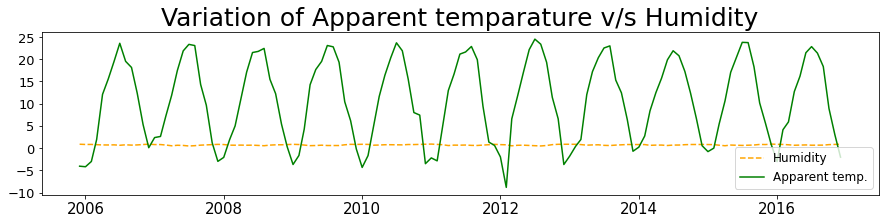

In [6]:
#Plotting the graph
plt.figure(figsize=(15,3));
plt.plot(data['Humidity'], label = 'Humidity', color = 'orange',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'green');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25);
plt.legend(loc = 0, fontsize = 12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 13);

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

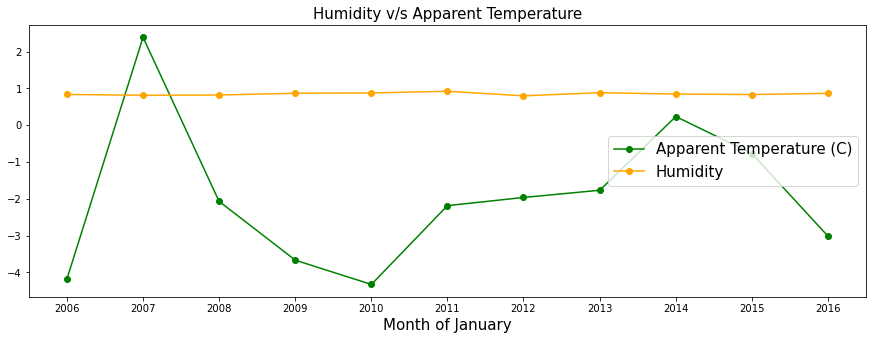

In [7]:
#Plotting the graph for month seperately
#January
jan = data[data.index.month==1]
plt.figure(figsize=(15,5))
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of January', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)



Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

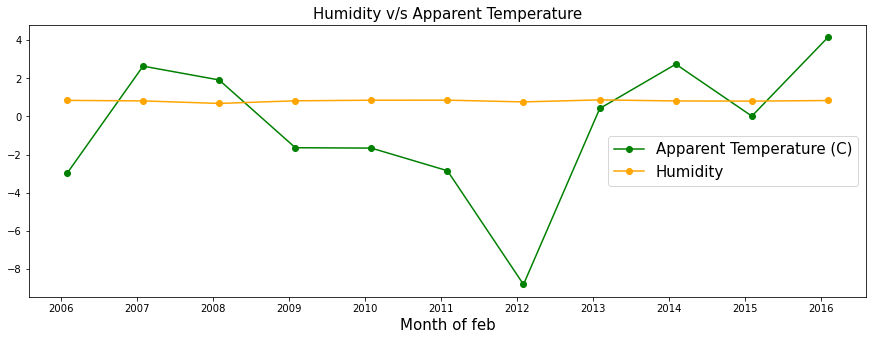

In [8]:
#february
feb = data[data.index.month==2]
plt.figure(figsize=(15,5))
plt.plot(feb.loc['2006-02-01':'2016-02-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(feb.loc['2006-02-01':'2016-02-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of feb', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

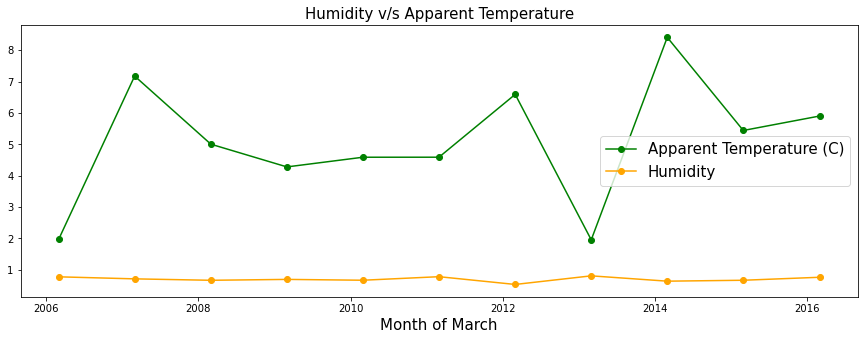

In [9]:
#March
march = data[data.index.month==3]
plt.figure(figsize=(15,5))
plt.plot(march.loc['2006-03-01':'2016-03-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(march.loc['2006-03-01':'2016-03-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of March', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

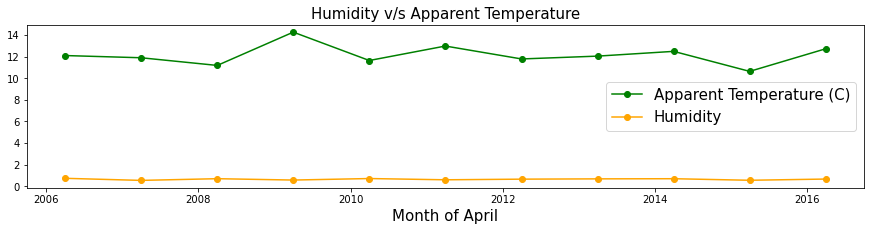

In [10]:
#April
april = data[data.index.month==4]
plt.figure(figsize=(15,3))
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)